In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('output.png')

In [10]:
f1=open('output_tensorflow_argmax.txt','r')
f2=open('output_quant_argmax.txt','r')


y_true = np.loadtxt(f1, dtype="int")
y_pred = np.loadtxt(f2, dtype="int")

f1.close()
f2.close()

In [11]:
cnf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
print(precision_recall_fscore_support(y_true, y_pred))
print("Accuracy score = "+str(acc))
np.savetxt('accuracy.txt', (acc,), fmt='%.12f')

(array([0.99892854, 0.999053  , 0.99876031, 0.9994139 ]), array([0.99910696, 0.99902556, 0.99880569, 0.99932596]), array([0.99901774, 0.99903928, 0.998783  , 0.99936993]), array([ 520691,  618815,  462190, 1102304], dtype=int64))
Accuracy score = 0.9991261094674556


Confusion matrix, without normalization
[[ 520226     178      88     199]
 [    212  618212     185     206]
 [    104     207  461638     241]
 [    242     201     300 1101561]]


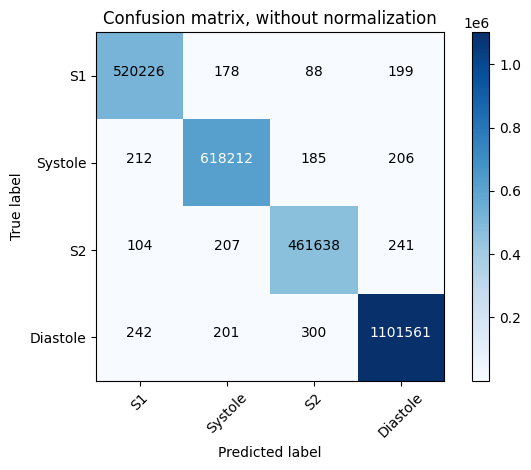

In [12]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['S1', 'Systole', 'S2', 'Diastole'],
                      title='Confusion matrix, without normalization')